In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_local", "cor_size_200bp_step_50bp", "summary")
fname = "cor.pLog2FC.combine.windows.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Peak", "Region",
           "Chrom_Track", "Start_Track", "End_Track", "Loc_Track",
           "cor_astarr_wstarr", "cor_astarr_tmpra", "cor_wstarr_tmpra",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

dat_rolling_cor = dat
print(dim(dat))
head(dat)

[1] 9118   13


Chrom,Start,End,Peak,Region,Chrom_Track,Start_Track,End_Track,Loc_Track,cor_astarr_wstarr,cor_astarr_tmpra,cor_wstarr_tmpra,Overlap
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126778751,126778951,126778851,-0.47028976,0.6814950,-0.30946194,49
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126778801,126779001,126778901,-0.77914765,0.1717113,-0.02573310,99
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126778851,126779051,126778951,-0.41288257,-0.7891069,-0.01979703,149
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126778901,126779101,126779001,-0.53068496,0.3361910,-0.69451977,199
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126778951,126779151,126779051,-0.47553420,0.2485319,-0.73220470,200
chr8,126778902,126779728,chr8_126778902_126779728,MYC,chr8,126779001,126779201,126779101,0.03886097,-0.5887484,-0.38226087,200


In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [4]:
dat = dat_rolling_cor
dat = dat %>% 
    group_by(Peak) %>%
    summarise(
        cor_astarr_wstarr_mu = mean(cor_astarr_wstarr),
        cor_astarr_tmpra_mu  = mean(cor_astarr_tmpra),
        cor_wstarr_tmpra_mu  = mean(cor_wstarr_tmpra),
        
        cor_astarr_wstarr_q25 = quantile(cor_astarr_wstarr, probs=0.25),
        cor_astarr_tmpra_q25  = quantile(cor_astarr_tmpra, probs=0.25),
        cor_wstarr_tmpra_q25  = quantile(cor_wstarr_tmpra, probs=0.25),
        
        cor_astarr_wstarr_q50 = quantile(cor_astarr_wstarr, probs=0.5),
        cor_astarr_tmpra_q50  = quantile(cor_astarr_tmpra, probs=0.5),
        cor_wstarr_tmpra_q50  = quantile(cor_wstarr_tmpra, probs=0.5),
        
        cor_astarr_wstarr_q75 = quantile(cor_astarr_wstarr, probs=0.75),
        cor_astarr_tmpra_q75  = quantile(cor_astarr_tmpra, probs=0.75),
        cor_wstarr_tmpra_q75  = quantile(cor_wstarr_tmpra, probs=0.75)
    )
dat_rolling_sum = dat
head(dat)

Peak,cor_astarr_wstarr_mu,cor_astarr_tmpra_mu,cor_wstarr_tmpra_mu,cor_astarr_wstarr_q25,cor_astarr_tmpra_q25,cor_wstarr_tmpra_q25,cor_astarr_wstarr_q50,cor_astarr_tmpra_q50,cor_wstarr_tmpra_q50,cor_astarr_wstarr_q75,cor_astarr_tmpra_q75,cor_wstarr_tmpra_q75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,-0.18127468,-0.21115912,-0.21716299,-0.6135967,-0.8132110,-0.8259526,-0.229850169,-0.54769216,-0.3230652,0.2317576,0.5388165,0.3159356
chr11_61560645_61561556,0.17339053,-0.12360605,0.10435204,-0.2166741,-0.6753074,-0.2878721,0.009281097,-0.22121697,0.3124746,0.6159998,0.3578571,0.4196466
chr11_61567108_61567997,0.26138151,0.25041520,0.01814805,-0.5653378,0.2297908,-0.6327766,0.680557832,0.31204459,0.0943920,0.8981547,0.6644260,0.6427077
chr11_61580592_61581826,0.43116637,0.08971366,-0.25060078,0.1703289,-0.6531617,-0.7737075,0.688340458,0.15231364,-0.5087642,0.8214968,0.8218343,0.1479528
chr11_61587170_61588742,0.14679704,-0.09365859,0.01170847,-0.3643061,-0.8069430,-0.6008330,0.334978207,-0.07165809,-0.1484564,0.6009396,0.5727815,0.7175140
chr11_61594868_61596571,0.01351688,-0.41569520,0.08414937,-0.3394891,-0.8390609,-0.4433223,-0.049592125,-0.69334700,0.1573338,0.4592163,-0.2696536,0.6387805


In [5]:
dat = dat_rolling_sum
dat = dat %>% dplyr::mutate(
    diff_astarr_wstarr = cor_astarr_wstarr_mu - cor_astarr_wstarr_q50,
    diff_astarr_tmpra  = cor_astarr_tmpra_mu  - cor_astarr_tmpra_q50,
    diff_wstarr_tmpra  = cor_wstarr_tmpra_mu  - cor_wstarr_tmpra_q50)

dat = dat %>% dplyr::select(starts_with("diff"))
head(dat)

diff_astarr_wstarr,diff_astarr_tmpra,diff_wstarr_tmpra
<dbl>,<dbl>,<dbl>
0.04857549,0.33653304,0.10590217
0.16410943,0.09761092,-0.20812257
-0.41917633,-0.06162939,-0.07624395
-0.25717409,-0.06259997,0.25816341
-0.18818117,-0.02200050,0.16016484
0.06310901,0.27765180,-0.07318447


In [29]:
dat = dat_rolling_cor
dat = dat %>% dplyr::select(Peak, cor_astarr_wstarr, cor_astarr_tmpra, cor_wstarr_tmpra)
head(dat)

Peak,cor_astarr_wstarr,cor_astarr_tmpra,cor_wstarr_tmpra
<chr>,<dbl>,<dbl>,<dbl>
chr8_126778902_126779728,-0.47028976,0.6814950,-0.30946194
chr8_126778902_126779728,-0.77914765,0.1717113,-0.02573310
chr8_126778902_126779728,-0.41288257,-0.7891069,-0.01979703
chr8_126778902_126779728,-0.53068496,0.3361910,-0.69451977
chr8_126778902_126779728,-0.47553420,0.2485319,-0.73220470
chr8_126778902_126779728,0.03886097,-0.5887484,-0.38226087


In [49]:
dat$Peak = factor(dat$Peak, levels=peaks)
dat = dat %>% slice_head(n=100)
gpt = ggplot(dat, aes(x=Peak, y=cor_astarr_wstarr_q50)) + 
    geom_bar(stat = "identity") +
    geom_errorbar(aes(
        x=Peak, 
        ymin=cor_astarr_wstarr_q25,
        ymax=cor_astarr_wstarr_q75,
        )) +
    theme_cowplot() + 
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=20),
          axis.title.y = element_text(size=20),
          title = element_text(size=30, face='bold'),
          legend.position = "none")

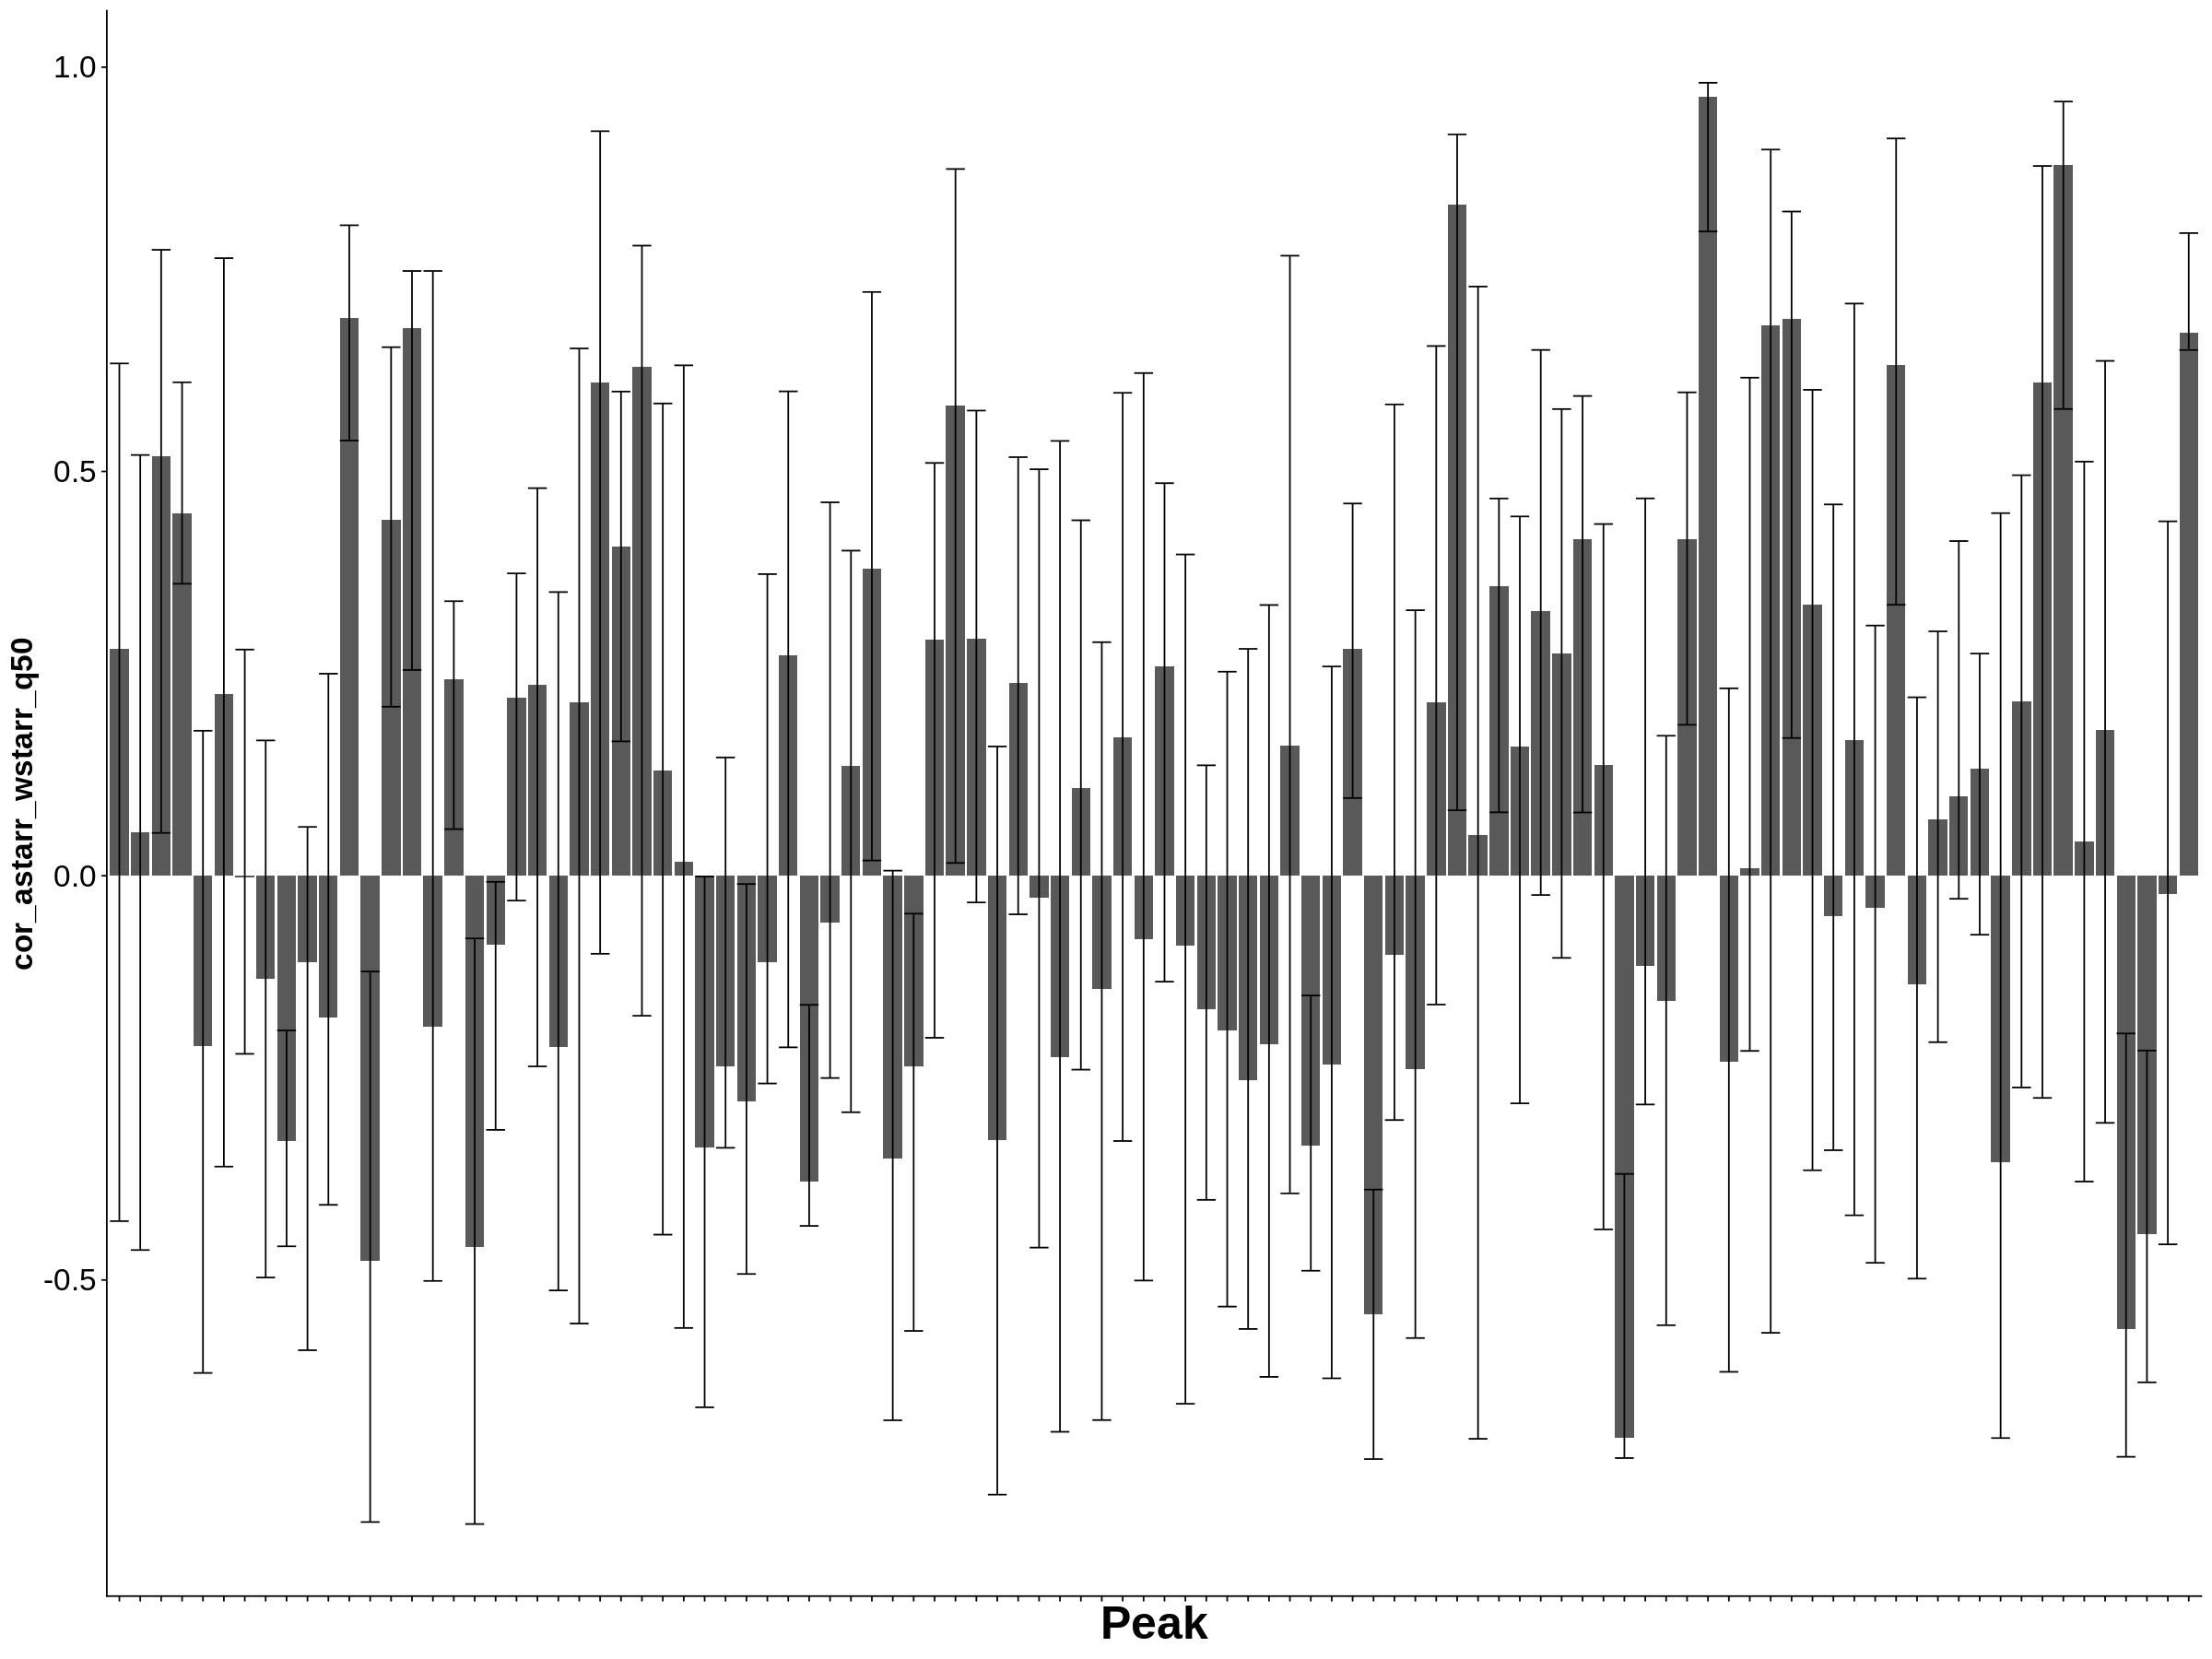

In [50]:
options(repr.plot.height=15, repr.plot.width=20)
print(gpt)

## Plot Spearman correlation

In [15]:
dat = dat_rolling_sum
dat = dat %>% dplyr::select(Peak, ends_with("_mu"))
head(dat)

Peak,cor_astarr_wstarr_mu,cor_astarr_tmpra_mu,cor_wstarr_tmpra_mu
<chr>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,-0.18127468,-0.21115912,-0.21716299
chr11_61560645_61561556,0.17339053,-0.12360605,0.10435204
chr11_61567108_61567997,0.26138151,0.25041520,0.01814805
chr11_61580592_61581826,0.43116637,0.08971366,-0.25060078
chr11_61587170_61588742,0.14679704,-0.09365859,0.01170847
chr11_61594868_61596571,0.01351688,-0.41569520,0.08414937


In [16]:
dat = dat_rolling_sum
dat = dat %>% dplyr::select(Peak, ends_with("_mu"))

dat = dat %>% gather(Assay, Value, -Peak)
lst = split(dat, dat$Assay)
lst = lapply(lst, function(dat){
    res = left_join(dat_region, dat, by="Peak")
    return(res)
})
head(lst[[1]])

Chrom,Start,End,Peak,Region,Assay,Value
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,cor_astarr_tmpra_mu,0.07901645
chr8,126782925,126783318,chr8_126782925_126783318,MYC,cor_astarr_tmpra_mu,0.04773967
chr8,126804776,126805825,chr8_126804776_126805825,MYC,cor_astarr_tmpra_mu,0.29908695
chr8,126817018,126817490,chr8_126817018_126817490,MYC,cor_astarr_tmpra_mu,-0.29505677
chr8,126820465,126821393,chr8_126820465_126821393,MYC,cor_astarr_tmpra_mu,0.29647656
chr8,126824093,126824987,chr8_126824093_126824987,MYC,cor_astarr_tmpra_mu,0.23854254


In [17]:
lst = lst
lst_gpt_cor = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Value, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Spearman Correlation") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

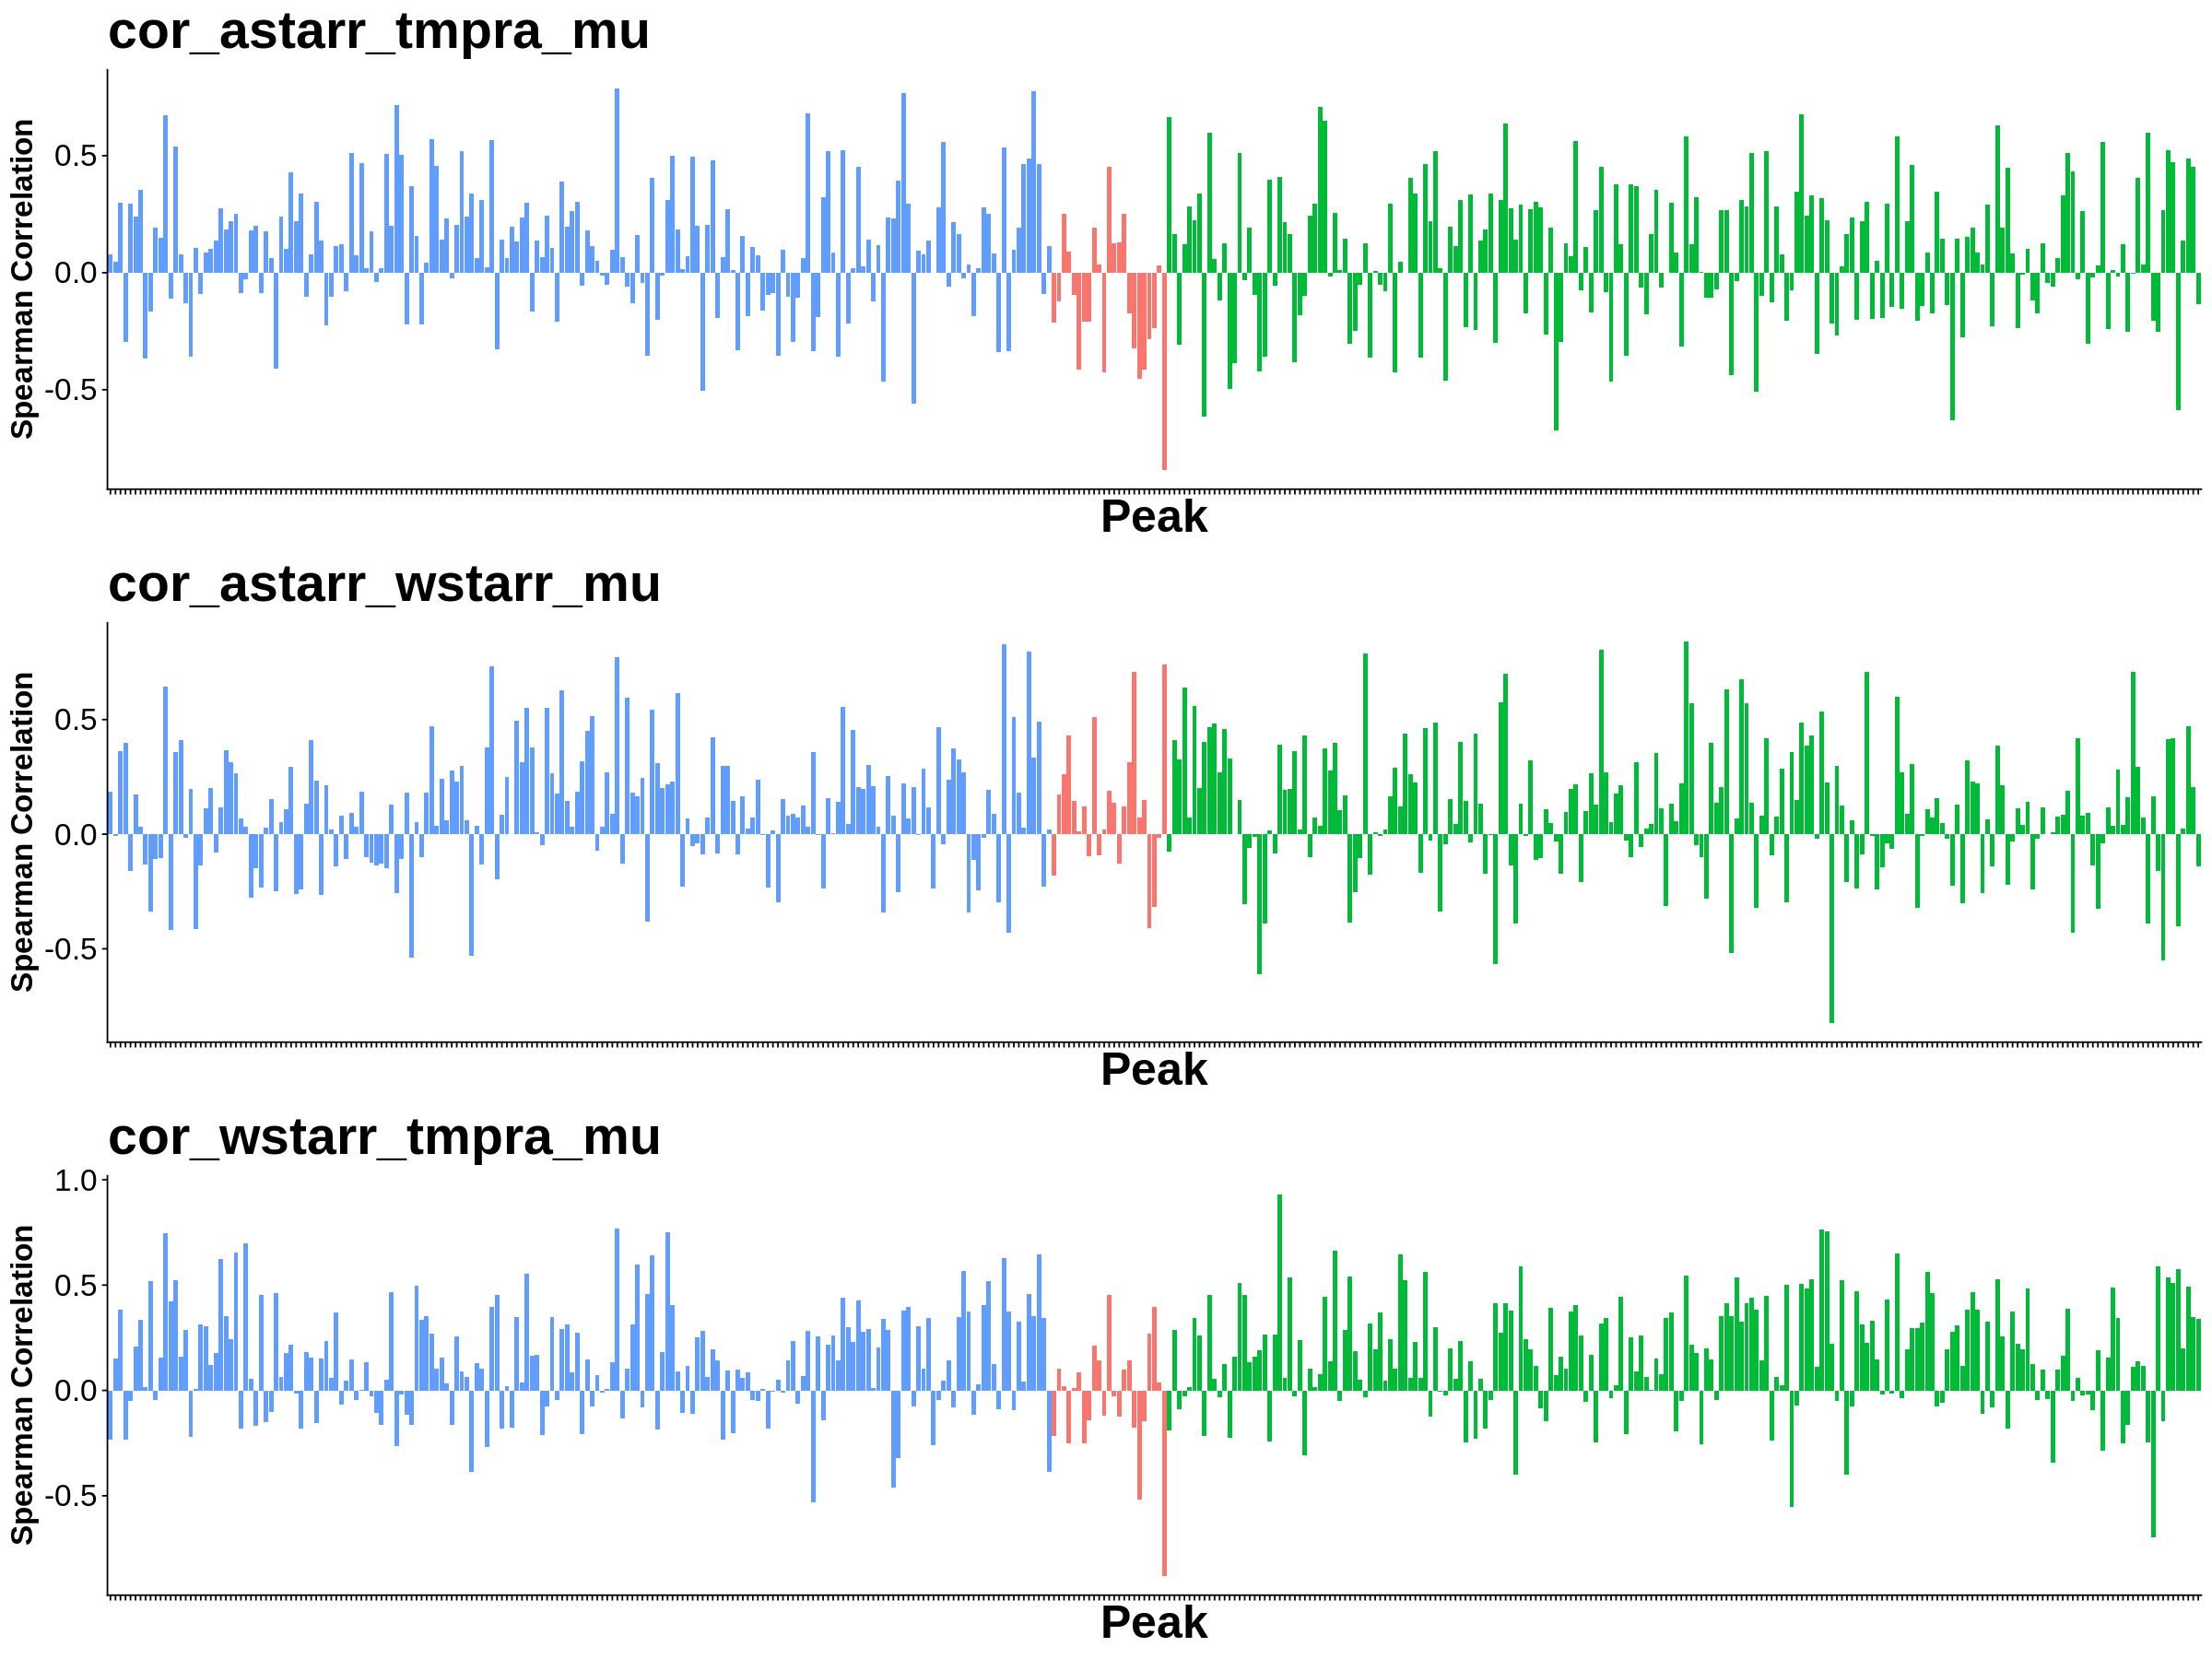

In [18]:
options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_cor, ncol=1, align = "v")

## Plot disimilarity

In [10]:
dat = dat_rolling_sum
dat = dat %>% dplyr::mutate(
    diff_astarr_wstarr = (1 - cor_astarr_wstarr_mu) / 2,
    diff_astarr_tmpra  = (1 - cor_astarr_tmpra_mu) / 2,
    diff_wstarr_tmpra  = (1 - cor_wstarr_tmpra_mu) / 2)

dat = dat %>% dplyr::select(Peak, starts_with("diff"))

dat = dat %>% gather(Assay, Value, -Peak)
lst = split(dat, dat$Assay)
lst = lapply(lst, function(dat){
    res = left_join(dat_region, dat, by="Peak")
    return(res)
})
head(lst[[1]])

Chrom,Start,End,Peak,Region,Assay,Value
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,diff_astarr_tmpra,0.4604918
chr8,126782925,126783318,chr8_126782925_126783318,MYC,diff_astarr_tmpra,0.4761302
chr8,126804776,126805825,chr8_126804776_126805825,MYC,diff_astarr_tmpra,0.3504565
chr8,126817018,126817490,chr8_126817018_126817490,MYC,diff_astarr_tmpra,0.6475284
chr8,126820465,126821393,chr8_126820465_126821393,MYC,diff_astarr_tmpra,0.3517617
chr8,126824093,126824987,chr8_126824093_126824987,MYC,diff_astarr_tmpra,0.3807287


In [11]:
lst = lst
lst_gpt_cor = lapply(lst, function(dat){
    dat$Peak = factor(dat$Peak, levels=peaks)
    txt = unique(dat$Assay)
    gpt = ggplot(dat, aes(x=Peak, y=Value, fill=Region)) + 
        geom_bar(stat = "identity") +
        labs(title=txt, y="Spearman Dissimilarity") +
        theme_cowplot() + 
        theme(axis.text.x = element_blank(),
              axis.text.y = element_text(size=20),
              axis.title.y = element_text(size=20),
              title =element_text(size=30, face='bold'),
             legend.position = "none")
    return(gpt)
})

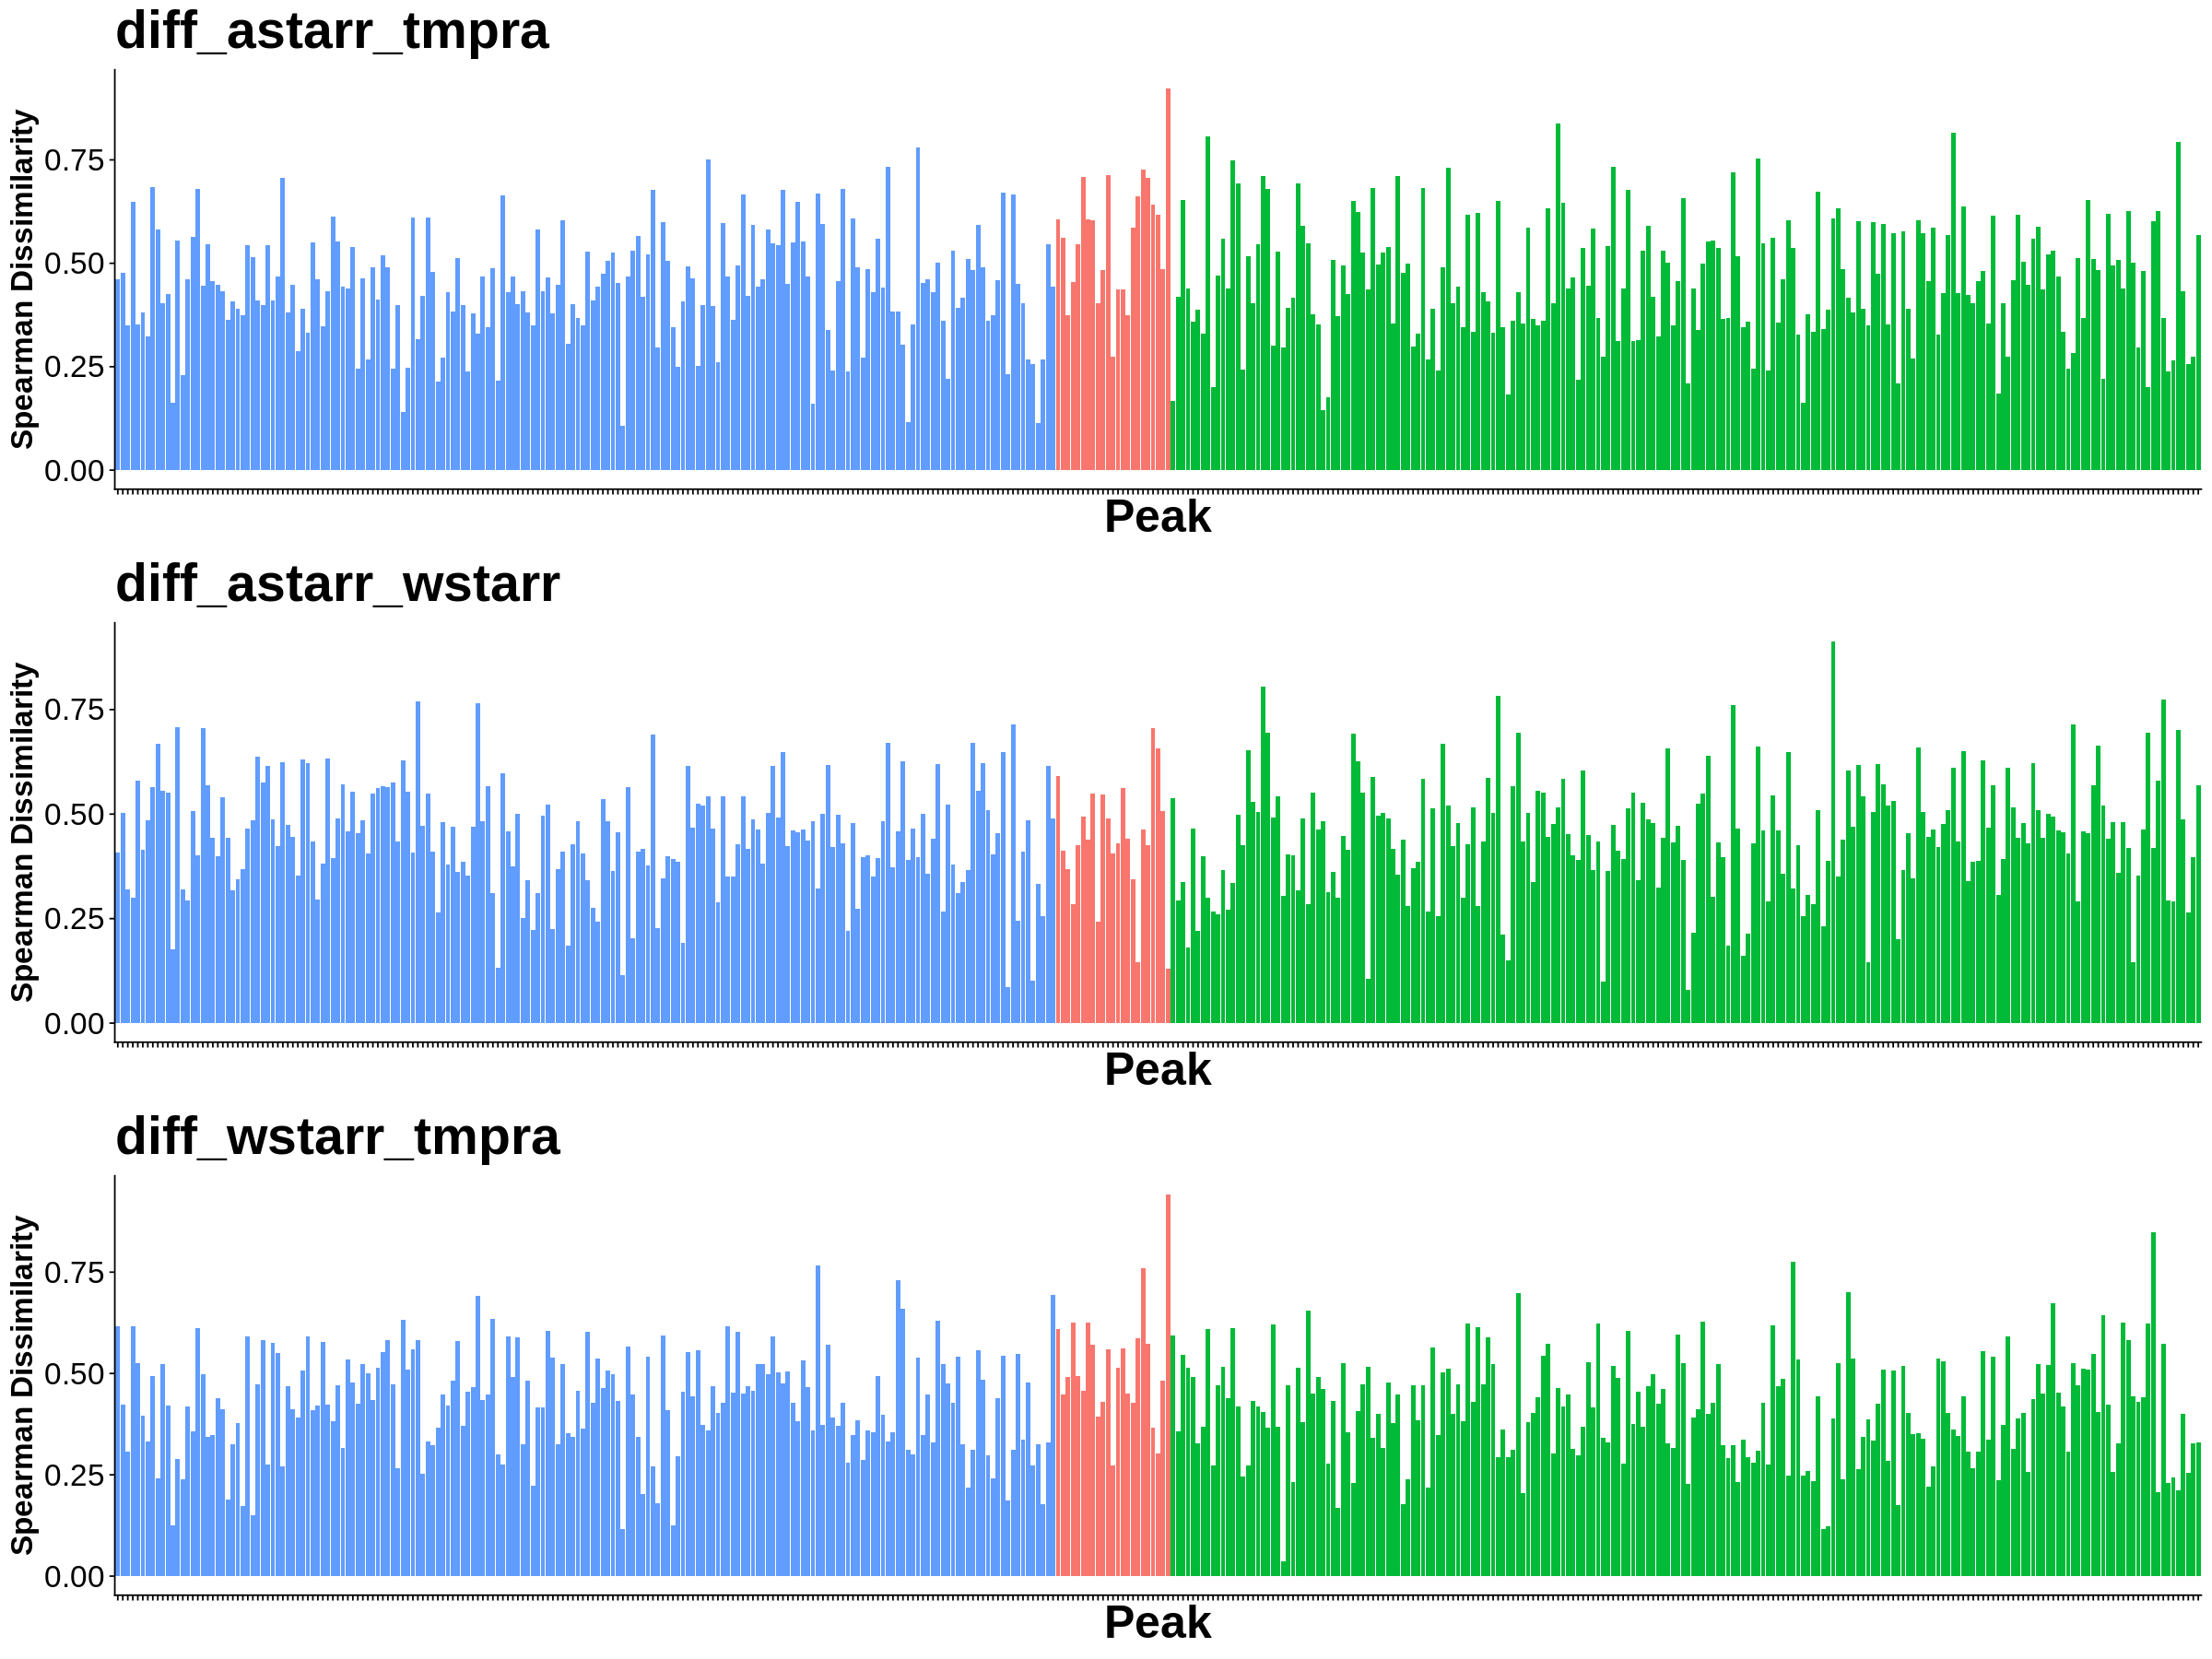

In [12]:
options(repr.plot.height=15, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_cor, ncol=1, align = "v")